In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN

# K-Means

In [2]:
# Load all CSV files in the directory into a list of DataFrames
csv_files = glob.glob('harth2/*.csv')

# Initialize a list to store the average feature values for clustering
average_feature_values = []

# Iterate through each CSV file
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        # Extract the values of the specified columns
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Calculate the average values for each feature
        avg_features = np.mean(features, axis=0)
        # Store the average feature values
        average_feature_values.append(avg_features)

# Convert the list of average feature values into an array
X = np.array(average_feature_values)

# Perform clustering based on the average feature values
kmeans = KMeans(n_clusters=3, random_state=42)  # num of clusters =3 
clusters = kmeans.fit_predict(X)

# Print the cluster each CSV belongs to
for i, csv_file in enumerate(csv_files):
    if csv_file.endswith('.csv'):
        print(f"{csv_file} belongs to Cluster {clusters[i] + 1}")

harth2\S006.csv belongs to Cluster 1
harth2\S008.csv belongs to Cluster 1
harth2\S009.csv belongs to Cluster 3
harth2\S010.csv belongs to Cluster 3
harth2\S012.csv belongs to Cluster 1
harth2\S013.csv belongs to Cluster 1
harth2\S014.csv belongs to Cluster 1
harth2\S015.csv belongs to Cluster 1
harth2\S016.csv belongs to Cluster 1
harth2\S017.csv belongs to Cluster 1
harth2\S018.csv belongs to Cluster 1
harth2\S019.csv belongs to Cluster 1
harth2\S020.csv belongs to Cluster 1
harth2\S021.csv belongs to Cluster 1
harth2\S022.csv belongs to Cluster 1
harth2\S023.csv belongs to Cluster 2
harth2\S024.csv belongs to Cluster 2
harth2\S025.csv belongs to Cluster 2
harth2\S026.csv belongs to Cluster 2
harth2\S027.csv belongs to Cluster 2
harth2\S028.csv belongs to Cluster 2
harth2\S029.csv belongs to Cluster 2


C:\Users\karag\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\karag\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


# Hierarchical

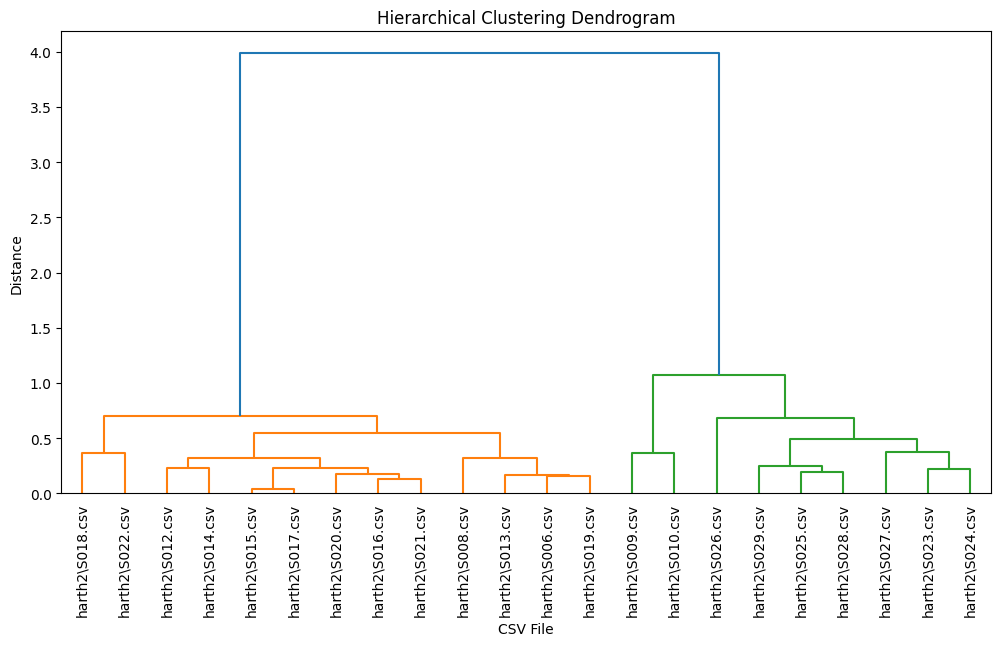

harth2\S006.csv belongs to Cluster 1
harth2\S008.csv belongs to Cluster 1
harth2\S009.csv belongs to Cluster 2
harth2\S010.csv belongs to Cluster 2
harth2\S012.csv belongs to Cluster 1
harth2\S013.csv belongs to Cluster 1
harth2\S014.csv belongs to Cluster 1
harth2\S015.csv belongs to Cluster 1
harth2\S016.csv belongs to Cluster 1
harth2\S017.csv belongs to Cluster 1
harth2\S018.csv belongs to Cluster 1
harth2\S019.csv belongs to Cluster 1
harth2\S020.csv belongs to Cluster 1
harth2\S021.csv belongs to Cluster 1
harth2\S022.csv belongs to Cluster 1
harth2\S023.csv belongs to Cluster 3
harth2\S024.csv belongs to Cluster 3
harth2\S025.csv belongs to Cluster 3
harth2\S026.csv belongs to Cluster 3
harth2\S027.csv belongs to Cluster 3
harth2\S028.csv belongs to Cluster 3
harth2\S029.csv belongs to Cluster 3


In [3]:
# Load all CSV files in the directory into a list of DataFrames
csv_files = glob.glob('harth2/*.csv')

# Initialize a list to store the median feature values for clustering
median_feature_values = []

# Iterate through each CSV file
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        # Extract the values of the specified columns
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Calculate the median values for each feature
        med_features = np.median(features, axis=0)
        # Store the median feature values
        median_feature_values.append(med_features)

# Convert the list of median feature values into a NumPy array
X = np.array(median_feature_values)

# Perform hierarchical clustering based on the median feature values
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=csv_files, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('CSV File')
plt.ylabel('Distance')
plt.show()

# Determine clusters from hierarchical clustering
max_clusters = 3  # Adjust the number of clusters as needed
clusters = fcluster(Z, max_clusters, criterion='maxclust')

# Print the cluster each CSV belongs to
for i, csv_file in enumerate(csv_files):
    if csv_file.endswith('.csv'):
        print(f"{csv_file} belongs to Cluster {clusters[i]}")

# DB SCAN

In [4]:
# Load all CSV files in the directory into a list of DataFrames
csv_files = glob.glob('harth2/*.csv')

# Initialize a list to store the median feature values for clustering
median_feature_values = []

# Iterate through each CSV file
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        # Extract the values of the specified columns
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Calculate the median values for each feature
        med_features = np.median(features, axis=0)
        # Store the median feature values
        median_feature_values.append(med_features)

# Convert the list of median feature values into a NumPy array
X = np.array(median_feature_values)

# Perform DBSCAN clustering based on the median feature values
dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(X)

# Determine the unique cluster labels
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)  # Exclude noise points if present

# Print the cluster each CSV belongs to
print(f"Number of clusters found: {num_clusters}")
for i, csv_file in enumerate(csv_files):
    if csv_file.endswith('.csv'):
        cluster_label = clusters[i]
        cluster_number = cluster_label + 1 if cluster_label != -1 else 'Noise'
        print(f"{csv_file} belongs to Cluster {cluster_number}")

Number of clusters found: 2
harth2\S006.csv belongs to Cluster 1
harth2\S008.csv belongs to Cluster 1
harth2\S009.csv belongs to Cluster 2
harth2\S010.csv belongs to Cluster 2
harth2\S012.csv belongs to Cluster 1
harth2\S013.csv belongs to Cluster 1
harth2\S014.csv belongs to Cluster 1
harth2\S015.csv belongs to Cluster 1
harth2\S016.csv belongs to Cluster 1
harth2\S017.csv belongs to Cluster 1
harth2\S018.csv belongs to Cluster 1
harth2\S019.csv belongs to Cluster 1
harth2\S020.csv belongs to Cluster 1
harth2\S021.csv belongs to Cluster 1
harth2\S022.csv belongs to Cluster 1
harth2\S023.csv belongs to Cluster 2
harth2\S024.csv belongs to Cluster 2
harth2\S025.csv belongs to Cluster 2
harth2\S026.csv belongs to Cluster 2
harth2\S027.csv belongs to Cluster 2
harth2\S028.csv belongs to Cluster 2
harth2\S029.csv belongs to Cluster 2
